## Classificação com Dados Desbalanceados

In [1]:
# Importação
import random
import pandas as pd
import numpy as np

In [2]:
# Base de dados
ds = pd.read_csv('./../Labs/Amostragem/credit_data.csv')
ds.shape

(2000, 5)

In [3]:
# Visualizando a base
ds.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [4]:
# Excluindo as NAs
ds.dropna(inplace=True)
ds.shape

(1997, 5)

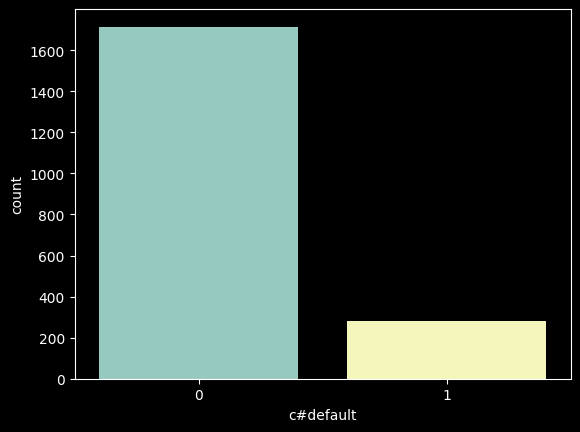

In [5]:
# Importando a biblioteca
import seaborn as sns
sns.countplot(data=ds, x=ds['c#default']); # Visualização limpa

In [6]:
# Criando as variáveis de previsões
X = ds.iloc[:, 1:4].values
X.shape

(1997, 3)

In [7]:
# Criando as variáveis de classes
y = ds.iloc[:, 4].values
y.shape

(1997,)

### Base de Treinamento e Teste


In [8]:
# Biblioteca
from sklearn.model_selection import train_test_split

In [9]:
# Criando as variáveis de treinamento e de teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(
    X, y, test_size=0.2, stratify=y
)

In [10]:
# Verificando o tamanho do treinamento
X_treinamento.shape, y_treinamento.shape

((1597, 3), (1597,))

In [11]:
# Verificando o tamanho do teste
X_teste.shape, y_teste.shape

((400, 3), (400,))

In [12]:
# Verificando os valores
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([1714,  283], dtype=int64))

In [13]:
# Verificando a porcentagem
print(f'0: {1714 / len(ds)}, 1: {283 / len(ds)}')

0: 0.8582874311467201, 1: 0.14171256885327993


In [14]:
# Verificando os valores de treinamentos
np.unique(y_treinamento, return_counts=True)

(array([0, 1], dtype=int64), array([1371,  226], dtype=int64))

In [15]:
# Porcentagem do treinamento
226 / len(y_treinamento)

0.14151534126487164

In [16]:
# Valores do teste
np.unique(y_teste, return_counts=True)

(array([0, 1], dtype=int64), array([343,  57], dtype=int64))

In [17]:
# Porcentagem do teste
57 / len(y_teste)

0.1425

### Classificação com Naïve Bayes

In [18]:
# Biblioteca
from sklearn.naive_bayes import GaussianNB

In [19]:
# Treinando o modelo
modelo = GaussianNB()
modelo.fit(X_treinamento, y_treinamento)

GaussianNB()

In [20]:
# Criando a variável de previsões
previsoes = modelo.predict(X_teste)
previsoes

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [21]:
# Verificando o y_teste
y_teste

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [22]:
# Biblioteca
from sklearn.metrics import accuracy_score

In [23]:
# Verificando a taxa de acerto
accuracy_score(previsoes, y_teste)

0.9125

In [24]:
# Biblioteca
from sklearn.metrics import confusion_matrix

In [25]:
# Criando a matrix 
cm = confusion_matrix(previsoes, y_teste)
cm

array([[334,  26],
       [  9,  31]], dtype=int64)

<AxesSubplot: >

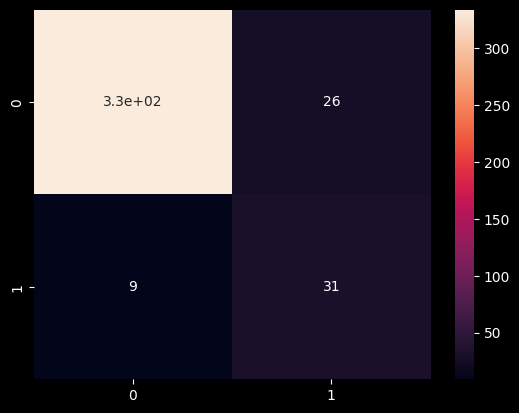

In [26]:
# Visualizando
sns.heatmap(cm, annot=True)

In [27]:
# Verificando a taxa de acerto a mão
(338 + 28) / (338 + 29 + 5 + 28)

0.915

In [28]:
# Percentual de acerto para pessoas que pagam o empréstimo
338 / (338 + 29)

0.9209809264305178

In [29]:
# Percentual de acerto para pessoas que não pagam o empréstimo
28 / (28 + 5)

0.8484848484848485

### Subamostragem(undersampling) - Tomek Linhs

In [30]:
# Biblioteca
from imblearn.under_sampling import TomekLinks

In [32]:
# Criando a Subamostragem
tl = TomekLinks(sampling_strategy='majority')
X_under, y_under = tl.fit_resample(X, y)

In [33]:
# Verificando o tamanho
X_under.shape, y_under.shape

((1897, 3), (1897,))

In [34]:
# Contando os valores únicos de y
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([1714,  283], dtype=int64))

In [35]:
# Contando os valores únicos de y_under
np.unique(y_under, return_counts=True)

(array([0, 1], dtype=int64), array([1614,  283], dtype=int64))

In [36]:
# Criando a Variáveis de Treinamento e teste
X_treinamento_u, X_teste_u, y_treinamento_u, y_teste_u = train_test_split(
    X_under, y_under, test_size=0.2, stratify=y_under
)
X_treinamento_u.shape, X_teste_u.shape

((1517, 3), (380, 3))

In [37]:
# Criando e treinando o modelo
modelo_u = GaussianNB()
modelo_u.fit(X_treinamento_u, y_treinamento_u)
previsoes_u = modelo_u.predict(X_teste_u)
accuracy_score(previsoes_u, y_teste_u)

0.9263157894736842

<AxesSubplot: >

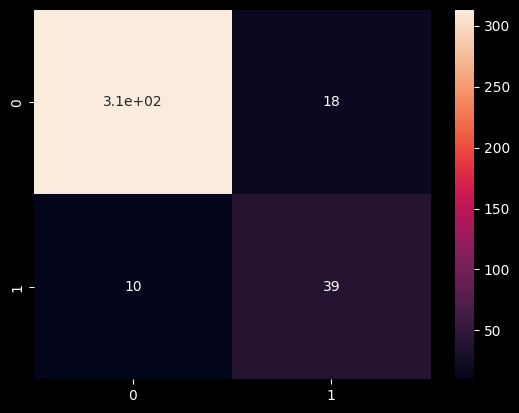

In [38]:
# Criando a matrix de confusão 
cm_u = confusion_matrix(previsoes_u, y_teste_u)
sns.heatmap(cm_u, annot=True)

In [39]:
# Visualizando
cm_u

array([[313,  18],
       [ 10,  39]], dtype=int64)

In [40]:
# Quem paga
313 / (313 + 18)

0.945619335347432

In [41]:
# Não paga
39 /(39 + 10)

0.7959183673469388